# Pandas introduction

Pandas nos otorga diversas facilidades para el ““domados de datos””. Nos otorga dos estructuras de datos:

    Series: Es un array unidimensional que representa una columna.
    DataFrame: Es un conjunto de series que forman una tabla. Se pueden acceder a través de indices como una etiqueta(label) o pueden ser posicionales es decir 0 o índice 100. También pueden ser rangos o slices

Estas estructuras de datos no son contenedores de datos. En Pandas las utilizamos para transformar y enriquecer nuestros datos, manipularlos, manejar los faltantes, realizar operaciones aritméticas, combinar diferentes dataframes en uno solo para obtener una nueva tabla.


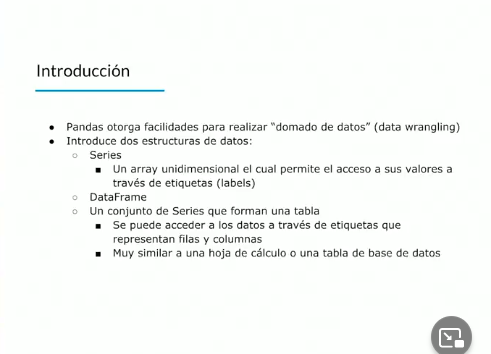
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

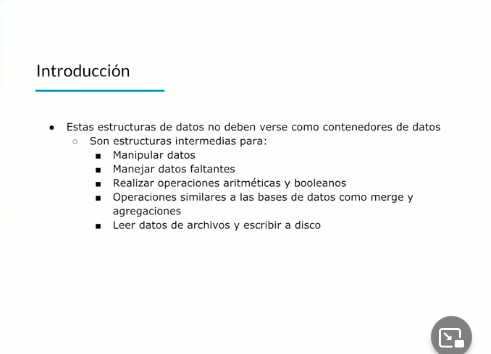

# series

Series es un vector unidimensional, para poder acceder a esta lista podemos usar posiciones o labels, siendo este último el preferido para manipular las series. Una diferencia importante sobre las listas de Python es que los datos son homogéneos, es decir solo podemos tener un tipo de dato por cada Serie.

Las Series se pueden crear a partir de cualquier secuencia(listas, tuplas, arrays de numpy y diccionarios).

En Python tenemos la filosofía del Duck Typing, si se ve como un pato y hace cuac, a ese animal le llamamos pato, si una serie se comporta una lista, se accede como una lista en principio deberíamos llamarla lista, pero esto no es así.

Una mejor aproximación para inicializar Series es utilizar diccionarios.

In [269]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords



series_test = pd.Series([100,200,300])

In [5]:
series_test

0    100
1    200
2    300
dtype: int64

In [7]:
series_test2 = pd.Series({1999: 48, 
                          2000: 65,
                          2001: 89})

In [8]:
series_test2

1999    48
2000    65
2001    89
dtype: int64

# Dataframes
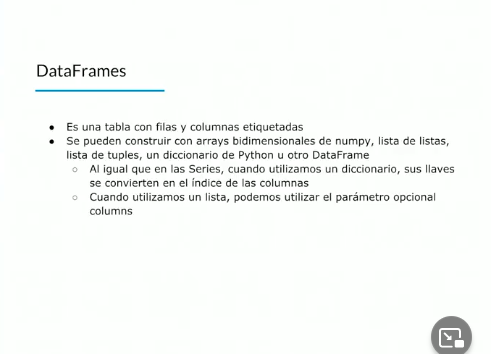
DataFrames son simplemente una tabla donde las filas y las columnas tienen etiquetas, se puede construir de diferentes formas pero siempre debemos considerar que la estructura que necesitamos construir para inicializarla tiene que ser bidimensional. Una matriz y puede ser una lista de listas, lista de tuplas, un diccionario de Python u otro DataFrame.

Si solo tenemos una dimensión a eso no le llamamos DataFrame, le llamamos Serie. Cuando utilizamos un diccionario las llaves se convierten en las llaves de la columna.

In [10]:
frame_test = pd.DataFrame({1999: [74,38,96,51],
                          2000: [57,62,46,96],
                          2001: [15,1,23,25]})
frame_test.ndim

2

# Indices y seleccion

Existen muchas formas de manipular los DataFrames y de seleccionar los elementos que queremos transformar.

    Dictionary like:

df[`col1`] 
df[['col1', 'col3']]

    Numpy like:

iloc = index location

df.iloc[:]
df.iloc[:,:]

    Label based:
    loc = location

df.loc[:]
df.loc[:,:]

Existe una gran diferencia en la forma en la que utilizamos estos slices porque varia de la forma tradicional de Python. loc va a incluir el final del que necesitamos.

In [57]:
dataframe = pd.read_csv('elpais_articles.csv')

In [34]:
dataframe

,body,link,title
0,Colombia’s police spied on Russian and Cuban ...,https://colombiareports.com/colombia-spied-on-...,Colombia spied on diplomats from Russia and Cu...
1,Police and prosecutors in Colombia continue t...,https://colombiareports.com/colombia-seeking-m...,Colombia seeking mastermind behind Paraguay pr...
2,Colombia’s government and guerrilla group ELN...,https://colombiareports.com/colombias-governme...,Colombia’s government and ELN rebels overcome ...
3,One of Colombia’s most notorious war lords ha...,https://colombiareports.com/colombias-war-crim...,Colombia’s war crimes tribunal hears notorious...
4,Colombia’s armed forces have said that five s...,https://colombiareports.com/colombias-farc-dis...,Colombia’s FARC dissidents captured 5 soldiers...
...,...,...,...
1058,Colombia’s government went into overdrive on ...,https://colombiareports.com/coronavirus-duque-...,Coronavirus: Duque goes in overdrive after Col...
1059,Colombia’s notoriously optimistic finance min...,https://colombiareports.com/finance-minister-e...,Finance minister expects ‘worst year in Colomb...
1060,Colombia’s government on Monday agreed not t...,https://colombiareports.com/colombia-agrees-to...,Colombia agrees to not use health workers as c...
1061,Residents of Colombia’s tourist city Cartagen...,https://colombiareports.com/cartagena-mayor-pr...,Cartagena mayor praised over expletive-laden t...


In [79]:
df = dataframe

In [373]:
series = pd.Series(df['body'])
series[0]
list2 = list(series)
# words = list(map(split, series))
# words = np.array([body.split() for body in series])
series = np.array([series])

# words = np.array([body for body in series])
# words[:5]
# list_with_words = words[:].copy()
# XD = np.array(np.array(np.char.split(word) for word in list_with_words[0])
# [list(['one', 'two', 'three']) list(['four', 'five', 'six'])
#  list(['seven', 'eight', 'nine'])]
# words = np.array([body.split() for body in series.values], dtype='S')



def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = np.unique(stopwords.words('english'))
    words = np.array([word for word in words if word not in stop_words])
    
    # Stem words
    stemmer = PorterStemmer()
    words = np.array(stemmer.stem(word) for word in words)
    
    return words

result = np.vectorize(normalize_text)(arr)




body_words = np.array(df[:])
body_words[0][0]
body_words
dataframe

# arr  = np.array(map(lambda a: a[0], dataframe['body'][:]), 
#                 np.array(map(lambda a: a[0], dataframe['link'][:])))
# arr
# dataframe['link'][:]


AttributeError: 'map' object has no attribute 'lower'

In [468]:
body = np.array(list(map(lambda a: normalize_text(a), dataframe['body'][:])))
# len(dataframe['body'][1])
# dataframe['body'][:
link = np.array(list(map(lambda a: a, dataframe['link'][:])))

body_words_and_links = pd.DataFrame({"body": [word for word in body[:]]})

body[0]
# body_words_and_links

array(<generator object normalize_text.<locals>.<genexpr> at 0x7f4d3214f2e0>,
      dtype=object)

##### normalizing words







In [236]:
XD

array([array(list(['Colombia’s', 'police', 'spied', 'on', 'Russian', 'and', 'Cuban', 'embassy', 'personnel', 'and', 'their', 'families', 'between', '2016', 'and', '2019,', 'according', 'to', 'evidence', 'obtained', 'by', 'Noticias', 'Uno.The', 'leaked', 'documents', 'did', 'not', 'reveal', 'if', 'the', 'spying', 'operations', 'resulted', 'in', 'any', 'information', 'that', 'would', 'suggest', 'that', 'the', 'diplomats', 'and', 'their', 'family', 'members', 'were', 'engaged', 'in', 'anything', 'out', 'of', 'the', 'ordinary,', 'according', 'to', 'Noticias', 'Uno.“Operation', 'Catedra”Russian', 'embassy', 'in', 'Bogota', '(Image:', 'Google', 'Maps)The', 'spying', 'operation', 'targeting', 'against', 'the', 'Russians', 'involved', 'the', 'shadowing', 'of', 'three', 'diplomats,', 'their', 'wives', 'and', 'their', 'children.The', 'police', 'began', 'intercepting', 'the', 'phones', 'of', 'the', 'Russian', 'embassy’s', 'second', 'secretary,', 'Denis', 'Viktorovich', 'Khromov,', 'and', 'everyon

### we have got the data ! , now lets take a look at it 

In [116]:
# we want to find all the tweets that have the following key words
colombia = ["uribe", "petro", "falsos", "positivos", "false", "positive", 'comunism','technology', 'platzi']
dead_people = ['dead', 'shoot','overdose','kill','suicide','died','assasinated']

# def look_bodys_by_key_words(keys):>?>
data_colombia = filter(lambda l: l in keys, dataframe['body'].values()[2].split())

TypeError: 'numpy.ndarray' object is not callable

In [54]:
dataframe['body'].values()

TypeError: 'numpy.ndarray' object is not callable